In [1]:
%run ../definitions.ipynb

In [5]:
popt_cs_s1_sel2, perr_cs_s1_sel2, perr_syst_cs_s1_sel2 = pickle.load(open('../light_yield/data/cs137_s1_sel2.pickle', 'rb'))
popt_cs_s2_sel2, perr_cs_s2_sel2, perr_syst_cs_s2_sel2 = pickle.load(open('../light_yield/data/cs137_s2_sel2.pickle', 'rb'))
popt_na_s1_sel2, perr_na_s1_sel2, perr_syst_na_s1_sel2 = pickle.load(open('../light_yield/data/na22_s1_sel2.pickle', 'rb'))
popt_na_s2_sel2, perr_na_s2_sel2, perr_syst_na_s2_sel2 = pickle.load(open('../light_yield/data/na22_s2_sel2.pickle', 'rb'))

In [7]:
def add_errs(err0, err1):
    return np.sqrt(err0**2 + err1**2)

In [8]:
s1_sel2 = np.array( [popt_na_s1_sel2['mu'], popt_cs_s1_sel2['mu'] ])
s2_sel2 = np.array( [popt_na_s2_sel2['mu'], popt_cs_s2_sel2['mu'] ])
ds1_sel2 = np.array( [add_errs(perr_na_s1_sel2['mu'], perr_syst_na_s1_sel2),
                      add_errs(perr_cs_s1_sel2['mu'], perr_syst_cs_s1_sel2)])
ds2_sel2 = np.array( [add_errs(perr_na_s2_sel2['mu'], perr_syst_na_s2_sel2),
                      add_errs(perr_cs_s2_sel2['mu'], perr_syst_cs_s2_sel2)])

E   = np.array( [511, 661.6] )

In [24]:
# low field x ray
# [s2, s1, ds1, ds2]
lf =  np.array([2.12546242e+03,  171.37057346, 3.00736526, 29.75193086]) / 29.8

# Zero field
zf = np.array([0, 196.35857265, 6.7605729, 0]) / 29.8

<Container object of 3 artists>

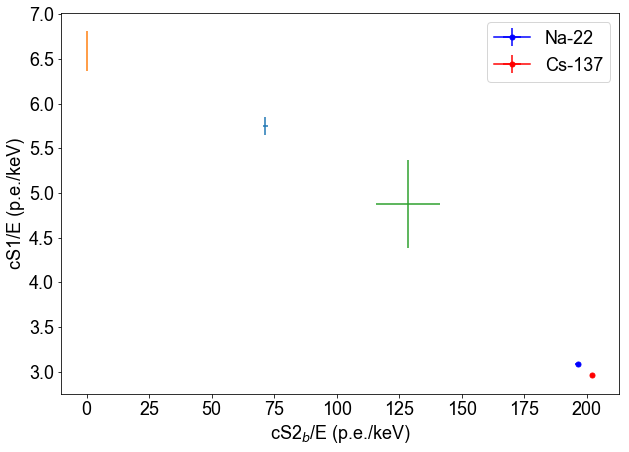

In [25]:
plt.errorbar(s2_sel2[0]/E[0], s1_sel2[0]/E[0], label= 'Na-22', 
             yerr = ds1_sel2[0]/E[0], xerr=ds2_sel2[0]/E[0], marker='.', markersize=10, color='blue')

plt.errorbar(s2_sel2[1]/E[1], s1_sel2[1]/E[1], label= 'Cs-137', 
             yerr = ds1_sel2[1]/E[1], xerr=ds2_sel2[1]/E[1], marker='.', markersize=10, color='red')
plt.errorbar(*lf)
plt.errorbar(*zf)

# plt.xlim(190, 215)
# plt.ylim(2.9,3.2)
plt.xlabel('cS2$_b$/E (p.e./keV)')
plt.ylabel('cS1/E (p.e./keV)')
plt.legend(loc='upper right')
plt.errorbar((17e3/40) * (1- 0.698), (195 / 40), xerr = 0.1 * (17e3/40) * (1- 0.698), yerr = (195 / 40) * 0.1)

In [26]:
def doke(s2_over_e, g1, g2):
    return g1/(13.7e-3) - (g1/g2) * s2_over_e

In [32]:
x_fit = [s2_sel2[0]/E[0], s2_sel2[1]/E[1], lf[0], zf[0], ]
y_fit = [s1_sel2[0]/E[0], s1_sel2[1]/E[1], lf[1], zf[1]]

In [34]:
scipy.optimize.curve_fit(doke, x_fit, y_fit, p0= [0.1, 5])

(array([ 0.09289299,  4.99062481]),
 array([[  8.86020837e-06,  -4.88631209e-04],
        [ -4.88631209e-04,   8.27325269e-02]]))

In [35]:
0.109266 / 0.09289299

1.176256679863572

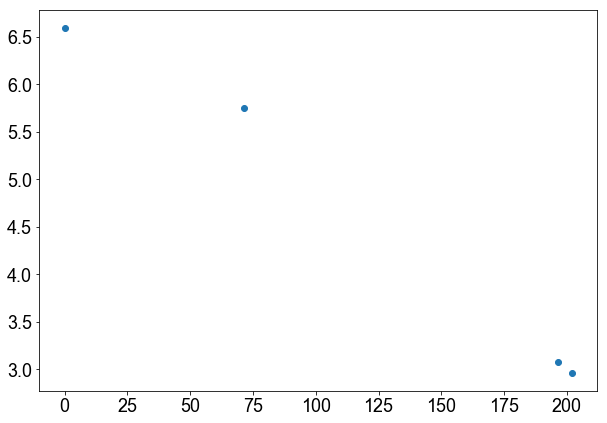

In [33]:
plt.scatter(x_fit, y_fit)